In [1]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import json
import os

In [2]:
import seaborn
seaborn.set()

# Load Model-Dataset Data

In [3]:
raw = pd.read_pickle(r'Output\combination_results.pkl')
raw['Base_model'] = raw.apply(lambda x: x['Model'].split('_')[0], axis=1)
raw

,Avg-R,Daily-R,Weekly-R,Coverage,Data,Model,Base_model
0,0.626759,0.629353,0.624164,0.940574,Daily,AgglomerativeClustering_100,AgglomerativeClustering
1,0.618368,0.626452,0.610284,0.928279,Weekly,AgglomerativeClustering_100,AgglomerativeClustering
2,0.612406,0.614074,0.610738,0.942623,Monthly,AgglomerativeClustering_100,AgglomerativeClustering
3,0.593114,0.599930,0.586298,0.987552,GICS_Sub,AgglomerativeClustering_100,AgglomerativeClustering
4,0.533164,0.540305,0.526023,0.815353,GICS_Sector,AgglomerativeClustering_100,AgglomerativeClustering
...,...,...,...,...,...,...,...
453,0.467208,0.482679,0.451737,0.997925,Monthly+GICS_Sub,DBSCAN_2,DBSCAN
454,0.476954,0.488858,0.465049,0.784232,Daily+Weekly+GICS_Sub,DBSCAN_2,DBSCAN
455,0.474927,0.483894,0.465959,0.892116,Daily+Monthly+GICS_Sub,DBSCAN_2,DBSCAN
456,0.473792,0.488697,0.458888,0.941909,Weekly+Monthly+GICS_Sub,DBSCAN_2,DBSCAN


# Coverage vs Correlation

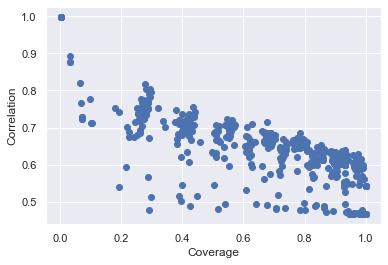

In [4]:
plt.scatter(raw['Coverage'],raw['Avg-R'])
plt.ylabel('Correlation')
plt.xlabel('Coverage')
plt.show()

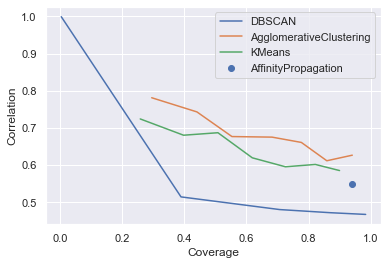

In [5]:
data = raw[raw['Data'] == 'Daily']
AgglomerativeClustering = data[data['Base_model'] == 'AgglomerativeClustering'][['Coverage','Avg-R']]
DBSCAN = data[data['Base_model'] == 'DBSCAN'][['Coverage','Avg-R']]
KMeans = data[data['Base_model'] == 'KMeans'][['Coverage','Avg-R']]
AffinityPropagation = data[data['Base_model'] == 'AffinityPropagation'][['Coverage','Avg-R']]

plt.plot(DBSCAN['Coverage'],DBSCAN['Avg-R'])
plt.plot(AgglomerativeClustering['Coverage'],AgglomerativeClustering['Avg-R'])
plt.plot(KMeans['Coverage'],KMeans['Avg-R'])
plt.scatter(AffinityPropagation['Coverage'],AffinityPropagation['Avg-R'])
plt.legend(['DBSCAN','AgglomerativeClustering','KMeans','AffinityPropagation'])
plt.ylabel('Correlation')
plt.xlabel('Coverage')
plt.show()

# Best Correlation Per Data Set

In [6]:
maxs = raw[raw['Coverage'] > .5][['Data','Avg-R']]
maxs = maxs.groupby('Data').agg('max')
bests = pd.merge(raw,maxs,on=['Avg-R','Data'])
bests

,Avg-R,Daily-R,Weekly-R,Coverage,Data,Model,Base_model
0,0.544248,0.554120,0.534376,0.504149,GICS_Sector,AgglomerativeClustering_250,AgglomerativeClustering
1,0.715074,0.728820,0.701328,0.676230,Daily+Weekly,AgglomerativeClustering_250,AgglomerativeClustering
2,0.691795,0.705279,0.678312,0.559426,Weekly,AgglomerativeClustering_300,AgglomerativeClustering
3,0.702267,0.722635,0.681898,0.567623,Monthly,AgglomerativeClustering_300,AgglomerativeClustering
4,0.677499,0.699951,0.655047,0.555328,Weekly+Monthly,AgglomerativeClustering_300,AgglomerativeClustering
5,0.690412,0.706587,0.674237,0.553942,Daily+GICS_Sector,AgglomerativeClustering_300,AgglomerativeClustering
6,0.704235,0.718480,0.689990,0.547718,Weekly+GICS_Sector,AgglomerativeClustering_300,AgglomerativeClustering
7,0.722714,0.738669,0.706760,0.545643,Daily+Weekly+GICS_Sector,AgglomerativeClustering_300,AgglomerativeClustering
8,0.710110,0.721002,0.699219,0.547718,Daily+Monthly+GICS_Sector,AgglomerativeClustering_300,AgglomerativeClustering
9,0.675471,0.696405,0.654537,0.541494,Weekly+Monthly+GICS_Sector,AgglomerativeClustering_300,AgglomerativeClustering


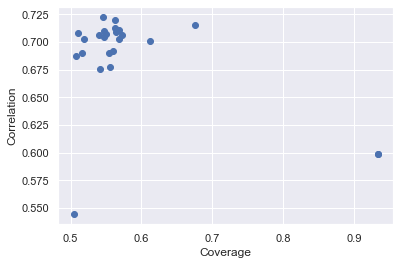

In [7]:
plt.scatter(bests['Coverage'],bests['Avg-R'])
plt.ylabel('Correlation')
plt.xlabel('Coverage')
plt.show()

# Notable Combinations

In [8]:
raw[(raw.Coverage > .6) & (raw['Avg-R'] > .7)]

,Avg-R,Daily-R,Weekly-R,Coverage,Data,Model,Base_model
74,0.715074,0.728820,0.701328,0.676230,Daily+Weekly,AgglomerativeClustering_250,AgglomerativeClustering
238,0.700762,0.708355,0.693169,0.612705,Daily+Weekly+Monthly,KMeans_250,KMeans
243,0.708853,0.710227,0.707480,0.626556,Daily+Monthly+GICS_Sector,KMeans_250,KMeans


# Load all clusters from all combinations

In [9]:
all_clusters = pd.DataFrame(columns=['Corr','Cluster'])
for subdir, dirs, files in os.walk('Output\Correlations'):
    for file in files:

        # for all files open both correlation and cluster, create and stack df
        with open('Output\Correlations\\'+file, 'r') as fp:
            correlations = json.load(fp)
        with open('Output\Clusters\\'+file, 'r') as fp:
            clusters = json.load(fp)

        clusters_df = pd.DataFrame.from_dict(correlations, orient='index')
        clusters_df = clusters_df.reset_index().rename(columns= {'index':'key',0:'Corr'})
        clusters_df['Cluster'] = clusters_df.apply(lambda x: clusters[x['key']],axis=1)
        clusters_df['Cluster_len'] = clusters_df.apply(lambda x: len(x['Cluster']), axis = 1)
        clusters_df['File'] = file
        clusters_df = clusters_df.drop('key', axis = 1)
        all_clusters = all_clusters.append(clusters_df)

all_clusters
    

,Corr,Cluster,Cluster_len,File
0,0.366488,"[A, ABBV, ABC, ABT, ALGN, ALXN, AMGN, BAX, BDX...",36.0,AffinityPropagation_Daily+GICS_Sector.json
1,0.406569,"[AFL, AIZ, AJG, ALL, AON, CBOE, CINF, CME, HIG...",21.0,AffinityPropagation_Daily+GICS_Sector.json
2,0.481137,"[ANTM, CI, CNC, HUM, UNH]",5.0,AffinityPropagation_Daily+GICS_Sector.json
3,0.413636,"[ADSK, AKAM, APH, CDW, CSCO, FFIV, GLW, HPE, H...",20.0,AffinityPropagation_Daily+GICS_Sector.json
4,0.788827,"[AIG, AMP, AXP, BAC, BEN, BK, BLK, C, CFG, CMA...",43.0,AffinityPropagation_Daily+GICS_Sector.json
...,...,...,...,...
34,0.509099,"[JNJ, MRK]",2.0,KMeans_400_Weekly.json
35,0.955940,"[AMT, CCI]",2.0,KMeans_400_Weekly.json
36,-0.047590,"[KO, PEP]",2.0,KMeans_400_Weekly.json
37,0.971360,"[DRE, PLD]",2.0,KMeans_400_Weekly.json


# Notable clusters

In [10]:
# for nice graphics, consider clusters larger than 4
notable_clusters = all_clusters[all_clusters.Cluster_len > 3]
notable_clusters = notable_clusters[notable_clusters.Corr > .95]
notable_clusters

,Corr,Cluster,Cluster_len,File
6,0.970481,"[ALK, DAL, LUV, UAL]",4.0,AffinityPropagation_Daily+Monthly.json
6,0.970481,"[ALK, DAL, LUV, UAL]",4.0,AffinityPropagation_Daily.json
19,0.968737,"[CCL, MGM, NCLH, RCL]",4.0,AffinityPropagation_Weekly+GICS_Sector.json
21,0.968737,"[CCL, MGM, NCLH, RCL]",4.0,AffinityPropagation_Weekly+Monthly+GICS_Sector...
16,0.968737,"[CCL, MGM, NCLH, RCL]",4.0,AffinityPropagation_Weekly+Monthly.json
...,...,...,...,...
44,0.976077,"[HBAN, KEY, RF, ZION]",4.0,KMeans_400_Monthly+GICS_Sub.json
47,0.980858,"[FITB, HBAN, KEY, RF]",4.0,KMeans_400_Weekly+GICS_Sub.json
31,0.963659,"[CFG, FITB, HBAN, KEY, RF, ZION]",6.0,KMeans_400_Weekly+Monthly+GICS_Sub.json
26,0.962740,"[CFG, CMA, HBAN, KEY, RF, ZION]",6.0,KMeans_400_Weekly+Monthly.json


# Best Model-Data Analysis

In [11]:
notable_clusters = all_clusters[all_clusters.File == 'AgglomerativeClustering_250_Daily+Weekly.json']
notable_clusters = notable_clusters[notable_clusters.Corr > .95]
notable_clusters = notable_clusters[notable_clusters.Cluster_len >= 3] # for nice visualizations
notable_clusters

,Corr,Cluster,Cluster_len,File
21,0.967270,"[CFG, CMA, FITB, HBAN, KEY, RF, ZION]",7.0,AgglomerativeClustering_250_Daily+Weekly.json
27,0.950646,"[AAPL, ADBE, CRM, MSFT, PYPL]",5.0,AgglomerativeClustering_250_Daily+Weekly.json
35,0.971163,"[AMAT, KLAC, LRCX]",3.0,AgglomerativeClustering_250_Daily+Weekly.json
56,0.967906,"[DHI, LEN, PHM]",3.0,AgglomerativeClustering_250_Daily+Weekly.json
82,0.981003,"[CAT, CMI, DE, PCAR]",4.0,AgglomerativeClustering_250_Daily+Weekly.json


In [12]:
ClustersVis = list(notable_clusters['Cluster'])
start = datetime(2019,11,1)
end = datetime(2020,8,1)
results = [yf.download(ClusterVis, start= start, end= end ,interval = '1d',prepost = True,threads = False)['Close'] for ClusterVis in ClustersVis]

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  4 of 4 completed


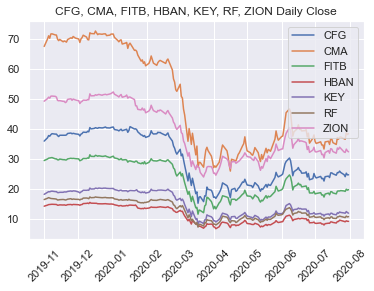

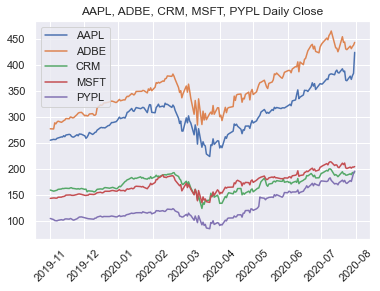

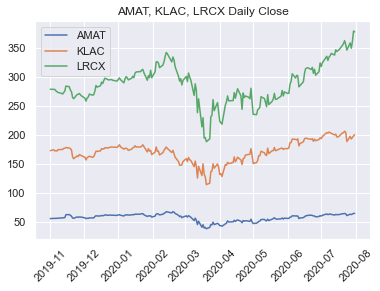

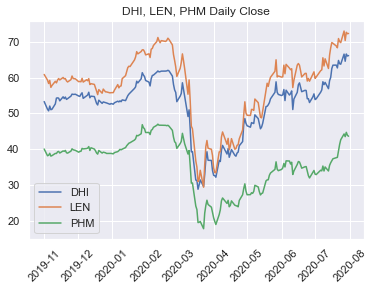

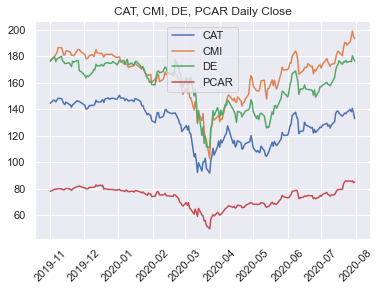

In [13]:
for result in results:
    plt.title(', '.join(result.columns) + ' Daily Close')    
    plt.plot(result)
    plt.xticks(rotation=45)
    plt.legend(result.columns)
    plt.show()